#***Stock Market Analysis-*** Anupam Patil
In this Notebook, we've used the stock related apis to derive & study data related to certain stocks, which is better termed as **Quant Finance**.

#**Installing the apis:**

In [ ]:
!pip install yahooquery

<**Only Ticker from yahoo query is sufficient for data collection therefore other libraries are ignored:**>

In [ ]:
from yahooquery import Ticker
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#**Setting up Tickers:**
We have used the following 5 stocks for analysis:
1.   Apple (AAPL)
2.   Microsoft (MSFT)
3.   Tesla (TSLA)
4.   HP (HPQ)
5.   Amazon (AMZN)


In [ ]:
tickers=Ticker('AAPL MSFT TSLA HPQ AMZN')

#**Deriving Datasets:**
i.e **.csv** files.
Also, for datasets which have null values, we've replaced all the null values with 0.0 as having null data may lead to disastrous consequences during EDA.

Historical Pricing:

In [ ]:
hist=tickers.history()
hist.to_csv('Historical Pricing.csv')
hist=pd.read_csv('Historical Pricing.csv')  #loading the dataset for analysis

Balance Sheets:

In [ ]:
b=tickers.balance_sheet()
b.to_csv('Balancesheet.csv')
b=pd.read_csv('Balancesheet.csv')
b.fillna(0,inplace=True)      #to fill null values with 0 in data
b.to_csv('Balancesheet.csv')
b=pd.read_csv('Balancesheet.csv') #loading the dataset for analysis

Income Statements:

In [ ]:
i=tickers.income_statement()
i.to_csv('IncomeStatement.csv')
i=pd.read_csv('IncomeStatement.csv')
i.fillna(0,inplace=True)    #to fill null values with 0 in data
i.reset_index()
i.to_csv('IncomeStatement.csv')
ist=pd.read_csv('IncomeStatement.csv')  #loading the dataset for analysis

Cashflow:

In [ ]:
cf=tickers.cash_flow()
cf.to_csv('Cashflow.csv')
cf=pd.read_csv('Cashflow.csv')
cf.fillna(0,inplace=True)   #to fill null values with 0 in data
cf.to_csv('Cashflow.csv')
cf=pd.read_csv('Cashflow.csv')  #loading the dataset for analysis

#**EDA Analysis:**

#**Comparison Chart between highs & lows of selected stocks:**
This Historical data has been analysed from 2nd January,2010 to 14th August,2020.
The scatterplot below is a depiction of the same in an attempt to study the relation between highs and lows of a stock in a given timespan. 

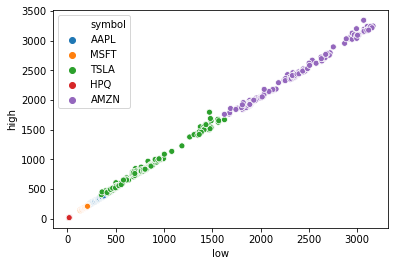

In [ ]:
sns.scatterplot(x = "low", y = "high", data = hist, hue='symbol')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


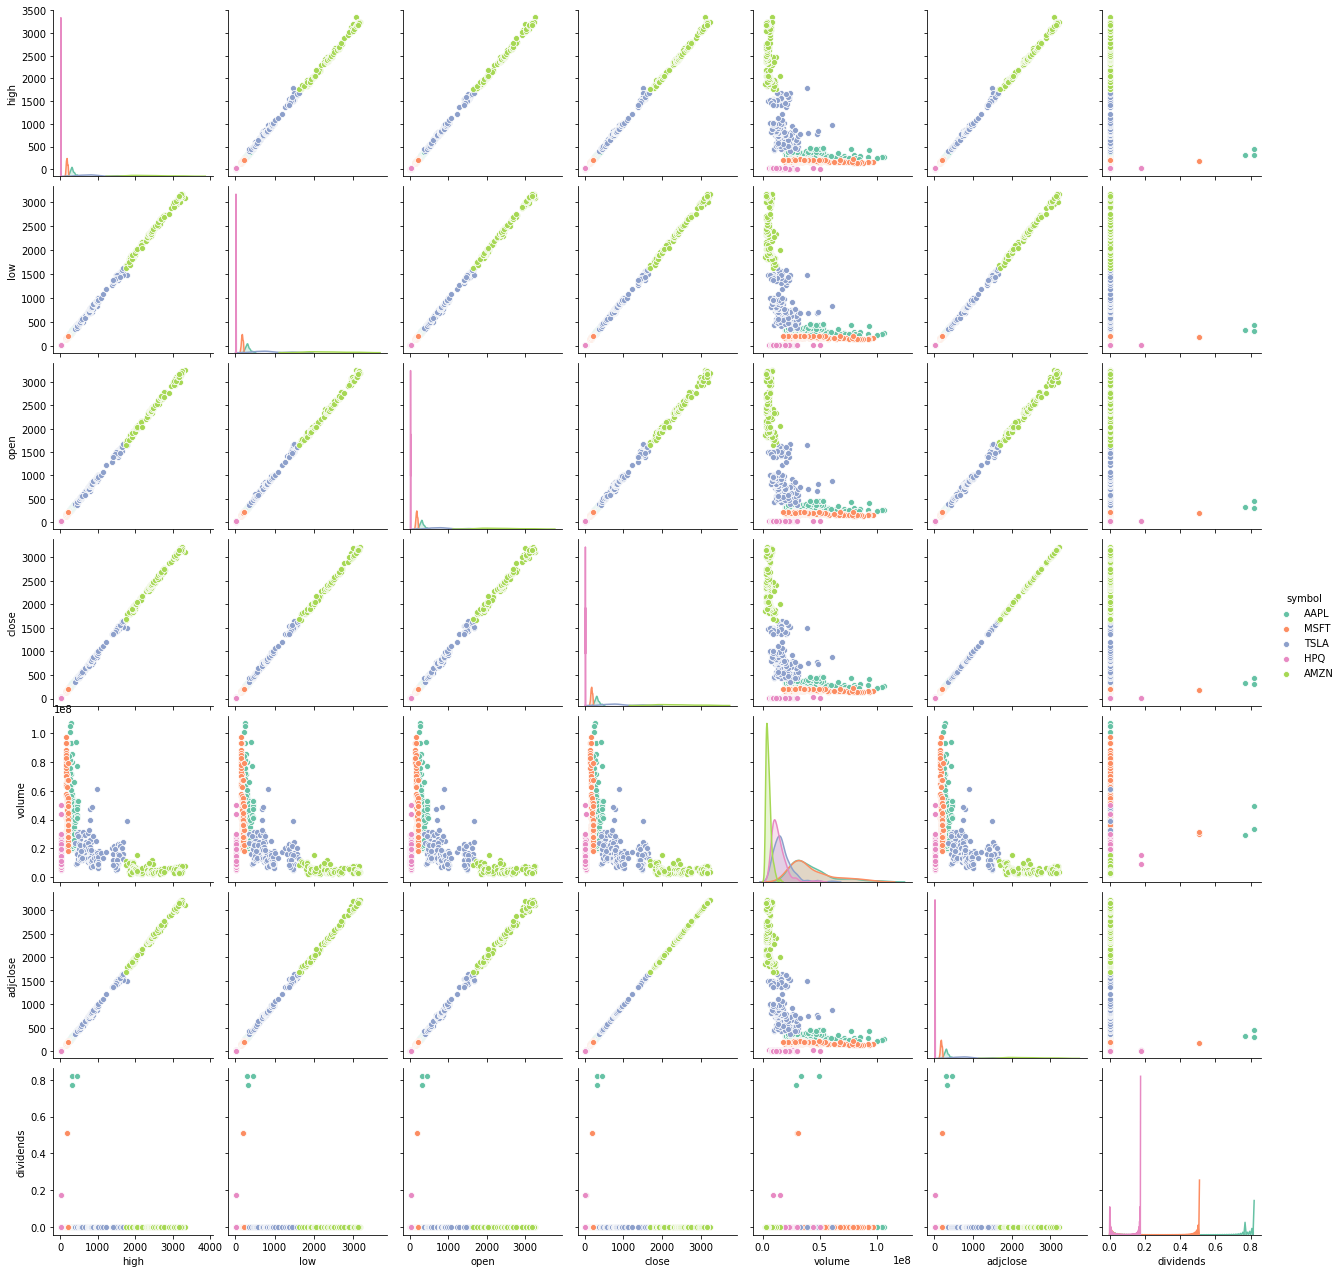

In [ ]:
sns.pairplot(hist, hue = "symbol", palette="Set2")

##**Current Debt Analysis of Each Company:**

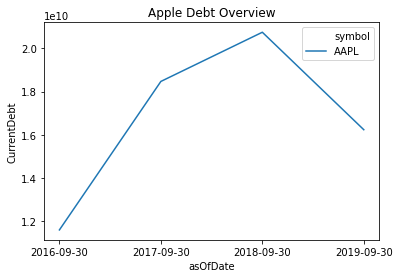

In [ ]:
a=sns.lineplot(x = "asOfDate", y = "CurrentDebt", data=b[b['symbol']=='AAPL'], hue = "symbol")
a.set_xticklabels(b['asOfDate'])
a.set_title('Apple Debt Overview')
plt.show()

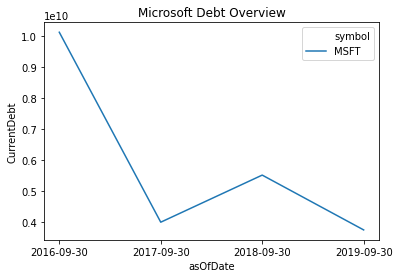

In [ ]:
a=sns.lineplot(x = "asOfDate", y = "CurrentDebt", data=b[b['symbol']=='MSFT'], hue = "symbol")
a.set_xticklabels(b['asOfDate'])
a.set_title('Microsoft Debt Overview')
plt.show()

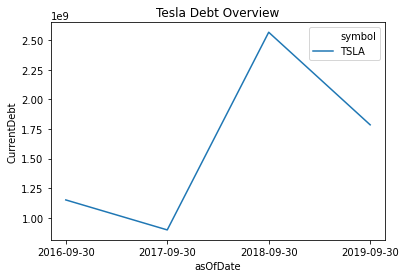

In [ ]:
a=sns.lineplot(x = "asOfDate", y = "CurrentDebt", data=b[b['symbol']=='TSLA'], hue = "symbol")
a.set_xticklabels(b['asOfDate'])
a.set_title('Tesla Debt Overview')
plt.show()

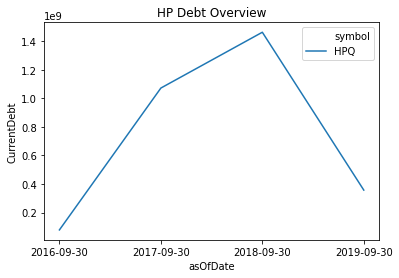

In [ ]:
a=sns.lineplot(x = "asOfDate", y = "CurrentDebt", data=b[b['symbol']=='HPQ'], hue = "symbol")
a.set_xticklabels(b['asOfDate'])
a.set_title('HP Debt Overview')
plt.show()

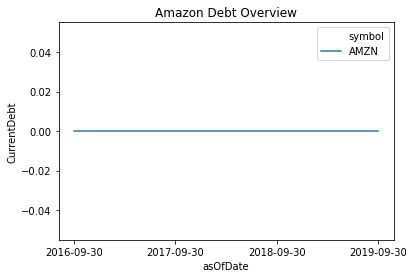

In [ ]:
a=sns.lineplot(x = "asOfDate", y = "CurrentDebt", data=b[b['symbol']=='AMZN'], hue = "symbol")
a.set_xticklabels(b['asOfDate'])
a.set_title('Amazon Debt Overview')
plt.show()  #Zero debt! Amazing!!

#**Analysis of Cashflow handling:**

In [ ]:
#CashFlow Analysis:
t=cf.describe()
t=t.drop(columns=['Unnamed: 0'],)
t[t.BeginningCashPosition != 2.500000e+01]


,BeginningCashPosition,CapitalExpenditure,CashDividendsPaid,CashFlowFromContinuingFinancingActivities,ChangeInAccountPayable,ChangeInCashSupplementalAsReported,ChangeInInventory,ChangeInWorkingCapital,ChangesInAccountReceivables,CommonStockIssuance,DeferredIncomeTax,DepreciationAndAmortization,EndCashPosition,FreeCashFlow,InvestingCashFlow,NetIncome,NetOtherFinancingCharges,NetOtherInvestingChanges,OperatingCashFlow,OtherNonCashItems,PurchaseOfBusiness,PurchaseOfInvestment,RepaymentOfDebt,RepurchaseOfCapitalStock,SaleOfInvestment,StockBasedCompensation
mean,1.434908e+10,-8.408614e+09,-5.601320e+09,-1.937098e+10,2.930080e+09,2.063537e+09,-8.250727e+08,4.388579e+09,-2.082277e+09,5.691564e+08,-9.561200e+08,8.125566e+09,1.642482e+10,2.340472e+10,-1.035819e+10,1.941898e+10,-1.199655e+09,-2.548896e+08,3.181333e+10,8.904164e+07,-2.384337e+09,-4.689892e+10,-6.222812e+09,-1.488812e+10,4.702943e+10,3.268000e+09
std,1.154283e+10,6.711565e+09,6.664153e+09,3.041388e+10,3.724903e+09,7.504488e+09,1.154079e+09,1.537656e+10,2.387231e+09,6.391686e+08,7.457043e+09,6.666150e+09,1.313669e+10,2.383392e+10,2.014176e+10,2.206451e+10,2.353656e+09,4.840519e+08,2.859107e+10,3.280193e+08,5.637573e+09,5.796126e+10,4.154812e+09,2.342825e+10,5.564633e+10,2.555269e+09
min,1.196908e+09,-2.426300e+10,-1.513700e+10,-9.097600e+10,-1.923000e+09,-1.711200e+10,-3.583000e+09,-5.550000e+09,-7.681000e+09,0.000000e+00,-3.259000e+10,3.320000e+08,3.367914e+09,-4.142008e+09,-4.678100e+10,-1.961400e+09,-1.036500e+10,-1.499000e+09,-1.238290e+08,-6.520000e+08,-2.594400e+10,-1.769050e+11,-1.555800e+10,-7.273800e+10,0.000000e+00,1.820000e+08
25%,5.449000e+09,-1.342700e+10,-1.276900e+10,-3.359000e+10,0.000000e+00,-1.950000e+08,-1.314000e+09,-6.938610e+08,-3.619000e+09,0.000000e+00,-3.400000e+08,1.636003e+09,6.288000e+09,2.991000e+09,-1.577300e+10,2.496000e+09,-1.247000e+09,-2.061490e+08,3.677000e+09,-9.216000e+06,-2.186000e+09,-7.719000e+10,-8.805000e+09,-2.296800e+10,3.200000e+08,4.667600e+08
50%,1.135600e+10,-8.302000e+09,-8.990000e+08,-5.643000e+09,1.429000e+09,1.188000e+09,-4.650000e+08,-1.610000e+08,-9.250000e+08,4.950000e+08,0.000000e+00,1.015700e+10,1.194600e+10,1.729600e+10,-6.061000e+09,1.007300e+10,-7.300000e+07,0.000000e+00,3.072300e+10,0.000000e+00,-6.240000e+08,-1.377700e+10,-5.518000e+09,-1.808000e+09,9.988000e+09,3.940000e+09
75%,2.048400e+10,-1.440471e+09,0.000000e+00,5.737550e+08,5.030000e+09,3.657000e+09,-6.800000e+07,2.148000e+09,-3.670000e+08,8.480000e+08,4.010000e+08,1.168200e+10,2.052200e+10,4.523400e+10,-1.416430e+09,4.428100e+10,0.000000e+00,0.000000e+00,6.067500e+10,2.840200e+08,-9.000000e+07,-1.260000e+08,-3.500000e+09,0.000000e+00,9.872400e+10,5.289000e+09
max,5.215100e+10,-4.020000e+08,0.000000e+00,9.860000e+09,1.148200e+10,2.431100e+10,8.280000e+08,6.936300e+10,1.095000e+09,2.309000e+09,1.304000e+10,2.284300e+10,5.022400e+10,7.170600e+10,4.589600e+10,5.953100e+10,8.290000e+08,2.200000e+08,8.000800e+10,8.170000e+08,0.000000e+00,0.000000e+00,-8.700000e+07,0.000000e+00,1.643940e+11,7.977000e+09


#**Analysis btw. Net Income & Gross Profits earned:**
Using Data from the Incomestatement Dataset,we've tried to find a relationship between Gross Profit and Net Income earned to try and find if any relation exists between the two. 

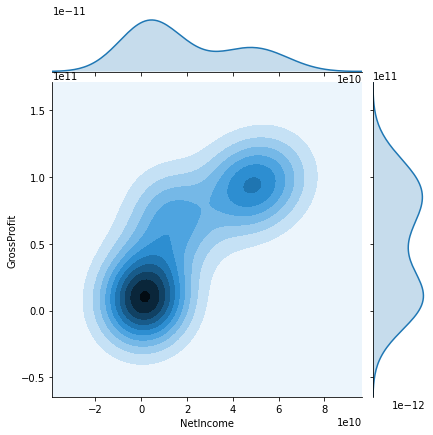

In [ ]:
sns.jointplot(ist["NetIncome"],ist["GrossProfit"],kind = "kde")   # contour plot

#**References:**


*   https://towardsdatascience.com/the-unofficial-yahoo-finance-api-32dcf5d53df

*   https://medium.com/swlh/retrieving-full-historical-data-for-every-cryptocurrency-on-binance-bitmex-using-the-python-apis-27b47fd8137f

*   https://medium.com/@Keithweaver_/using-a-stock-market-api-4ce65b7c67ac

